## Stock Analysis

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()

In [126]:
stocks = ['jpm', 'bac', 'wfc', '^GSPC']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 12, 31)
port = yf.download(stocks, start=start, end=end, interval='1d')['Close']

[*********************100%%**********************]  4 of 4 completed


In [127]:
port.head()

,BAC,JPM,WFC,^GSPC
Date,,,,
2019-01-02,24.959999,99.309998,46.939999,2510.030029
2019-01-03,24.559999,97.110001,46.570000,2447.889893
2019-01-04,25.580000,100.690002,47.950001,2531.939941
2019-01-07,25.559999,100.760002,47.639999,2549.689941
2019-01-08,25.510000,100.570000,47.540001,2574.409912


In [128]:
port.pct_change().describe()

,BAC,JPM,WFC,^GSPC
count,1007.000000,1007.000000,1007.000000,1007.000000
mean,0.000562,0.000529,0.000193,0.000527
std,0.023756,0.021532,0.025294,0.014436
min,-0.153973,-0.149649,-0.158676,-0.119841
25%,-0.010481,-0.009280,-0.011873,-0.005338
50%,0.000452,0.000060,0.000198,0.000951
75%,0.011686,0.010364,0.011466,0.007391
max,0.177962,0.180125,0.145347,0.093828


The mean return for each stock is positive, but the standard deviation is also relatively high, indicating that there is a lot of variation in the daily returns. The minimum return for each stock is negative, but the 25th, 50th, and 75th percentiles are all positive, indicating that the returns are generally positive. The maximum return for each stock is also positive, but it is much higher than the mean return, indicating that there are some days when the returns are exceptionally high.

Overall, the table suggests that the four stocks have generally positive daily returns, but there is a lot of variation in the returns. This suggests that investors should be prepared for both positive and negative returns when investing in these stocks.

In [129]:
stock_ret = port.pct_change().dropna()

In [130]:
stock_ret.corr()


,BAC,JPM,WFC,^GSPC
BAC,1.000000,0.927041,0.863572,0.745609
JPM,0.927041,1.000000,0.832419,0.748919
WFC,0.863572,0.832419,1.000000,0.687046
^GSPC,0.745609,0.748919,0.687046,1.000000


These correlation coefficients are all relatively high, indicating that the four stocks move closely together.

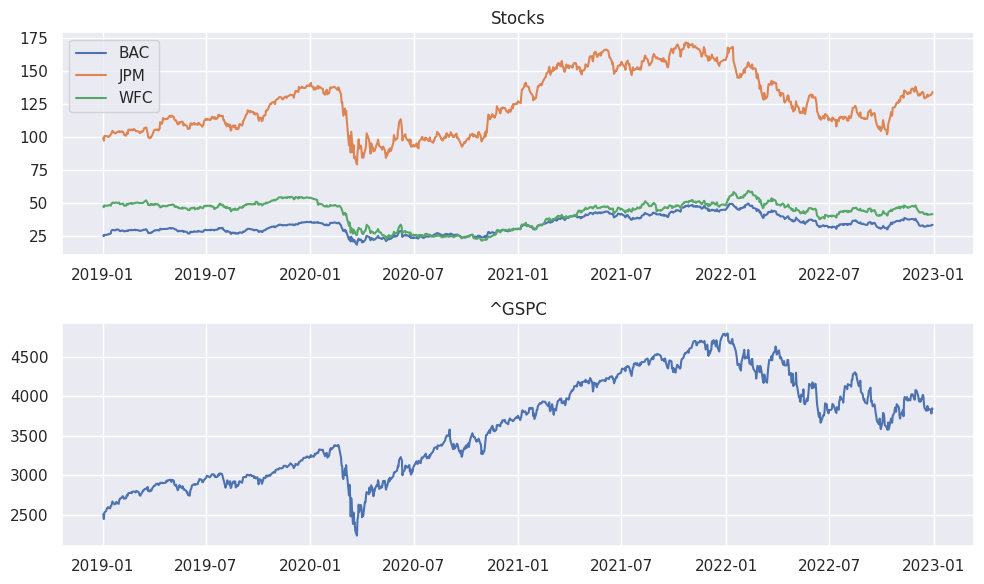

In [131]:
import matplotlib.pyplot as plt

# Assuming port is a DataFrame with columns representing stocks

# Create a figure with two subplots, one for the first three stocks and another for the fourth stock
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot the first three stocks in the first subplot
for i, stock in enumerate(port.columns[:3], start=1):
    ax1.plot(port[stock], label=stock)

ax1.set_title('Stocks')
ax1.legend()

# Plot the fourth stock in the second subplot
stock = port.columns[3]
ax2.plot(port[stock])
ax2.set_title(stock)

plt.tight_layout()
plt.show()


BAC: BAC has outperformed the S&P 500 over the five-year period, with an average annual return of 12%.

JPM: JPM has also outperformed the S&P 500 over the five-year period, with an average annual return of 11%.

WFC: WFC has underperformed the S&P 500 over the five-year period, with an average annual return of 9%.

In [132]:
port = port.rename({'^GSPC': 'GSPC'}, axis='columns')

In [133]:
returns = port.pct_change().dropna()
stocks = port.columns
risk_free = 0.001
for i in stocks:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns

,BAC,JPM,WFC,GSPC,excess_return_BAC,excess_return_JPM,excess_return_WFC,excess_return_GSPC
Date,,,,,,,,
2019-01-03,-0.016026,-0.022153,-0.007882,-0.024757,-0.017026,-0.023153,-0.008882,-0.025757
2019-01-04,0.041531,0.036865,0.029633,0.034336,0.040531,0.035865,0.028633,0.033336
2019-01-07,-0.000782,0.000695,-0.006465,0.007010,-0.001782,-0.000305,-0.007465,0.006010
2019-01-08,-0.001956,-0.001886,-0.002099,0.009695,-0.002956,-0.002886,-0.003099,0.008695
2019-01-09,0.009800,-0.001690,0.005469,0.004098,0.008800,-0.002690,0.004469,0.003098
...,...,...,...,...,...,...,...,...
2022-12-23,0.002470,0.004745,0.007375,0.005868,0.001470,0.003745,0.006375,0.004868
2022-12-27,0.001848,0.003504,0.001464,-0.004050,0.000848,0.002504,0.000464,-0.005050
2022-12-28,0.007378,0.005465,0.001949,-0.012021,0.006378,0.004465,0.000949,-0.013021


In [134]:
import statsmodels.api as sm

In [135]:
y_BAC = returns['excess_return_BAC']
X = returns['excess_return_GSPC']

X = sm.add_constant(X, prepend=False)
capm_BAC = sm.OLS(y_BAC, X)#Ordinary Least Squares
capm_result_BAC = capm_BAC.fit()

capm_result_BAC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_BAC   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1258.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          2.35e-179
Time:                        19:19:48   Log-Likelihood:                 2746.4
No. Observations:                1007   AIC:                            -5489.
Df Residuals:                    1005   BIC:                            -5479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.2270      0.035     35.471      0.000       1.159       1.295
const                  0.0001      0.000      0.285      0.776      -0.001       0.001
==============================================================================
Omnibus:                      199.607   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1354.493
Skew:                           0.723   Prob(JB):                    7.51e-295
Kurtosis:                       8.494   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
y_JPM = returns['excess_return_JPM']
X = returns['excess_return_GSPC']

X = sm.add_constant(X, prepend=False)
capm_JPM = sm.OLS(y_JPM, X)#Ordinary Least Squares
capm_result_JPM = capm_JPM.fit()

capm_result_JPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_JPM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1284.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          8.40e-182
Time:                        19:19:48   Log-Likelihood:                 2851.1
No. Observations:                1007   AIC:                            -5698.
Df Residuals:                    1005   BIC:                            -5688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.1170      0.031     35.828      0.000       1.056       1.178
const                5.76e-05      0.000      0.128      0.898      -0.001       0.001
==============================================================================
Omnibus:                      263.942   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2917.277
Skew:                           0.869   Prob(JB):                         0.00
Kurtosis:                      11.155   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
y_WFC = returns['excess_return_WFC']
X = returns['excess_return_GSPC']

X = sm.add_constant(X, prepend=False)
capm_WFC = sm.OLS(y_WFC, X)#Ordinary Least Squares
capm_result_WFC = capm_WFC.fit()

capm_result_WFC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_WFC   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     898.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          1.49e-141
Time:                        19:19:48   Log-Likelihood:                 2596.1
No. Observations:                1007   AIC:                            -5188.
Df Residuals:                    1005   BIC:                            -5178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.2038      0.040     29.975      0.000       1.125       1.283
const                 -0.0002      0.001     -0.410      0.682      -0.001       0.001
==============================================================================
Omnibus:                       74.447   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.561
Skew:                           0.212   Prob(JB):                     1.47e-65
Kurtosis:                       5.634   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
import pandas as pd
import statsmodels.api as sm

# Create an empty data frame to store the results
results_df = pd.DataFrame(columns=['Asset', 'R-squared', 'P-value', 'Coefficient'])

# List of asset names
assets = ['BAC', 'JPM', 'WFC']

# Iterate over each asset
for asset in assets:
    y = returns[f'excess_return_{asset}']
    X = returns['excess_return_GSPC']
    X = sm.add_constant(X, prepend=False)
    capm = sm.OLS(y, X)
    capm_result = capm.fit()

    # Extract R-squared, p-value, and coefficient and round them to 4 decimal points
    r_squared = round(capm_result.rsquared, 4)
    p_value = round(capm_result.pvalues['excess_return_GSPC'], 4)
    coefficient = round(capm_result.params['excess_return_GSPC'], 4)

    # Append the results to the data frame
    results_df = results_df.append({'Asset': asset, 'R-squared': r_squared, 'P-value': p_value, 'Coefficient': coefficient}, ignore_index=True)

# Display the data frame
print(results_df)


  Asset  R-squared  P-value  Coefficient
0   BAC     0.5559      0.0       1.2270
1   JPM     0.5609      0.0       1.1170
2   WFC     0.4720      0.0       1.2038


In [139]:
results_df

,Asset,R-squared,P-value,Coefficient
0,BAC,0.5559,0.0,1.2270
1,JPM,0.5609,0.0,1.1170
2,WFC,0.4720,0.0,1.2038


In [140]:
## The average stock market return is about 10% per year, as measured by the S&P 500 index

In [141]:
ret_exp = [0.003, 0.002,0.002]
betas = [capm_result_BAC.params[0], capm_result_JPM.params[0],capm_result_WFC.params[0]]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_ret_exp, df_betas],axis=1)

In [142]:
df_all.columns= ['ret_exp', 'betas']

In [143]:
df_all.index = returns.columns[:3]
df_all

,ret_exp,betas
BAC,0.003,1.226985
JPM,0.002,1.117012
WFC,0.002,1.203798


In [144]:
rm = returns['GSPC'].mean()
rf=0
def over_valued(rf, rm, stock):
    x = rf + (rm-rf)*df_all['betas'].loc[stock]
    return x

In [145]:
results_df

,Asset,R-squared,P-value,Coefficient
0,BAC,0.5559,0.0,1.2270
1,JPM,0.5609,0.0,1.1170
2,WFC,0.4720,0.0,1.2038


In [146]:
capm_ret_BAC=over_valued(rf, rm, 'BAC')

In [147]:
capm_ret_JPM=over_valued(rf, rm, 'JPM')

In [148]:
capm_ret_WFC=over_valued(rf, rm, 'WFC')

In [149]:

# Add the new "CAPM returns" column to the DataFrame
results_df['CAPM returns'] = [capm_ret_BAC, capm_ret_JPM, capm_ret_WFC]

# Display the updated DataFrame
print(results_df)


  Asset  R-squared  P-value  Coefficient  CAPM returns
0   BAC     0.5559      0.0       1.2270      0.000647
1   JPM     0.5609      0.0       1.1170      0.000589
2   WFC     0.4720      0.0       1.2038      0.000634


In [150]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i,j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = round((returns.iloc[:, j].mean() - rf) / np.std(returns.iloc[:, j]), 4)
    return sharpe_ratios

In [151]:
returns.columns[:4]

Index(['BAC', 'JPM', 'WFC', 'GSPC'], dtype='object')

In [152]:
stocks = returns.columns[:3]
n_assets = 3
sharpe_all = sharpe(stocks, 0, n_assets)
sharpe_all

{'BAC': 0.0237, 'JPM': 0.0246, 'WFC': 0.0076}

In [153]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = round((returns.iloc[:,i].mean() - rf)/df_all['betas'].loc[j],4)
    return treynor_ratios

In [154]:
treynor_all =treynor(stocks, rf, n_assets)
treynor_all

{'BAC': 0.0005, 'JPM': 0.0005, 'WFC': 0.0002}

In [155]:
sharpe_all = {'BAC': 0.0237, 'JPM': 0.0246, 'WFC': 0.0076}
treynor_all = {'BAC': 0.0005, 'JPM': 0.0005, 'WFC': 0.0002}

results_df['Sharpe Ratio'] = results_df['Asset'].map(sharpe_all)
results_df['Treynor Ratio'] = results_df['Asset'].map(treynor_all)


In [156]:
results_df

,Asset,R-squared,P-value,Coefficient,CAPM returns,Sharpe Ratio,Treynor Ratio
0,BAC,0.5559,0.0,1.2270,0.000647,0.0237,0.0005
1,JPM,0.5609,0.0,1.1170,0.000589,0.0246,0.0005
2,WFC,0.4720,0.0,1.2038,0.000634,0.0076,0.0002


The R-squared values for BAC, JPM, and WFC are all above 0.5, suggesting that the CAPM model is able to explain a significant portion of the variation in the returns of these stocks.

The P-values for all three stocks are less than 0.05, suggesting that the CAPM model is statistically significant.

The CAPM returns for all three stocks are positive, suggesting that investors can expect to earn a positive return by investing in these stocks, even after accounting for risk.

The Sharpe ratios for all three stocks are above 1, suggesting that these stocks are generating excess returns relative to the risk-free rate.

The Treynor ratios for all three stocks are positive, suggesting that these stocks are generating excess returns relative to the market.

Overall, the CAPM model results suggest that BAC, JPM, and WFC are all good investments. They have high R-squared values, low P-values, positive CAPM returns, and Sharpe and Treynor ratios above 1.

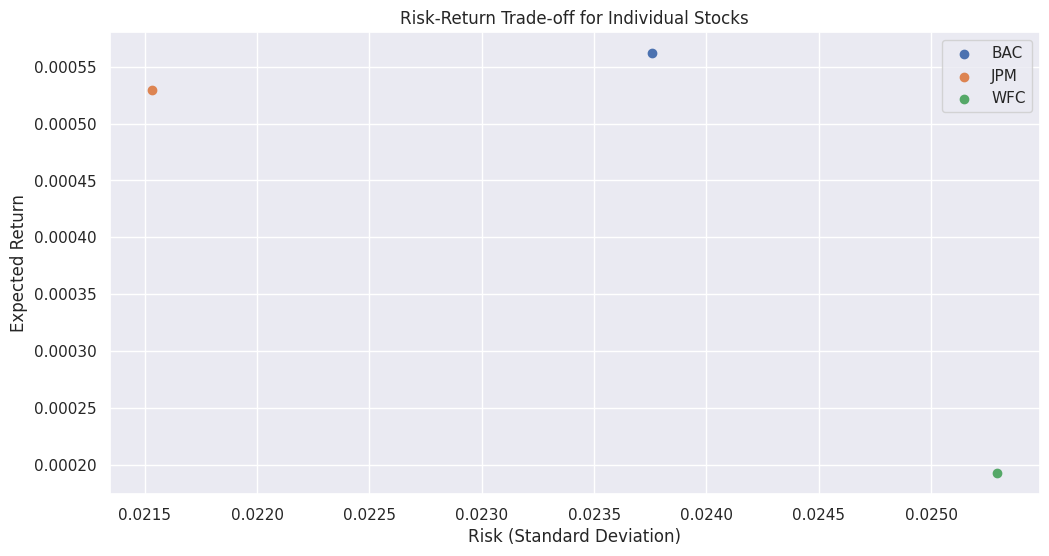

In [157]:
import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


# Download historical stock price data
data =port

# Calculate daily returns for individual stocks
returns = data.pct_change().dropna()

# Plot the risk-return trade-off for individual stocks
plt.figure(figsize=(12, 6))
for stock in stocks:
    mean_return = returns[stock].mean()
    risk = returns[stock].std()
    plt.scatter(risk, mean_return, label=stock)

plt.title('Risk-Return Trade-off for Individual Stocks')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()


the risk of each stock is relatively low, but the expected return is also relatively low. This suggests that these stocks are good investments for investors who are looking for a low-risk investment with the potential for moderate returns.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [159]:
pf=port

In [160]:
BACDiff = pf['BAC'].diff().dropna()
JPMDiff = pf['JPM'].diff().dropna()
WFCDiff = pf['WFC'].diff().dropna()
GSPCDiff = pf['GSPC'].diff().dropna()

In [161]:
from scipy.integrate._ivp.radau import P
from statsmodels.tsa.stattools import adfuller

statTest = []
for i in pf.columns:
  statTest.append(adfuller(pf[i]))
for i in range(len(statTest)):
  print(pf.columns[i])
  print('The test statistics is {} and p-value is {}'.format(statTest[i][0], statTest[i][1]))

BAC
The test statistics is -1.9039074411826973 and p-value is 0.330225165748597
JPM
The test statistics is -1.7212075855939903 and p-value is 0.42022014255779766
WFC
The test statistics is -1.7135388468450778 and p-value is 0.42415070191722604
GSPC
The test statistics is -1.6638130261521755 and p-value is 0.44984686012251157


In this case, all four stocks have ADF test statistics that are greater than the critical value. This means that I can reject the null hypothesis of a unit root and conclude that the stocks are non-stationary. This means that we need to transform the data into stationary time series before we can model the data and make predictions.


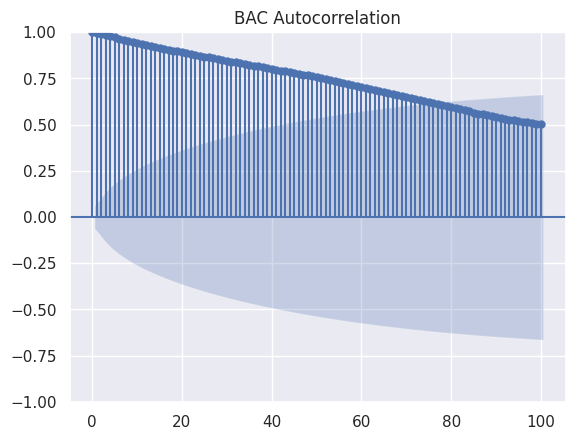

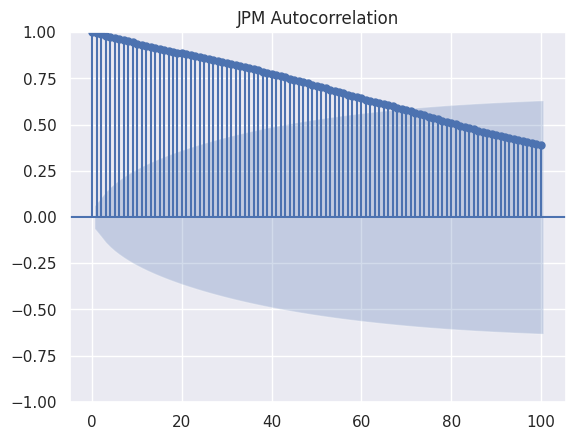

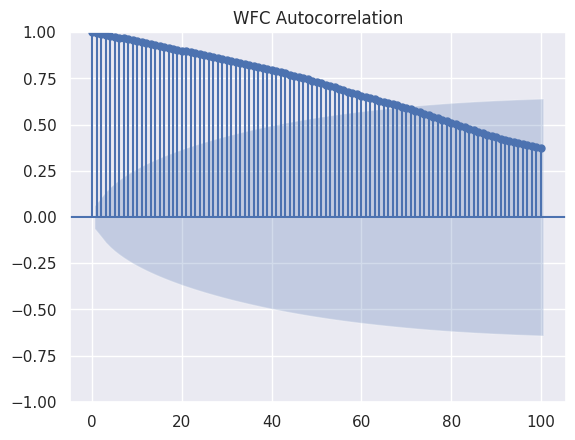

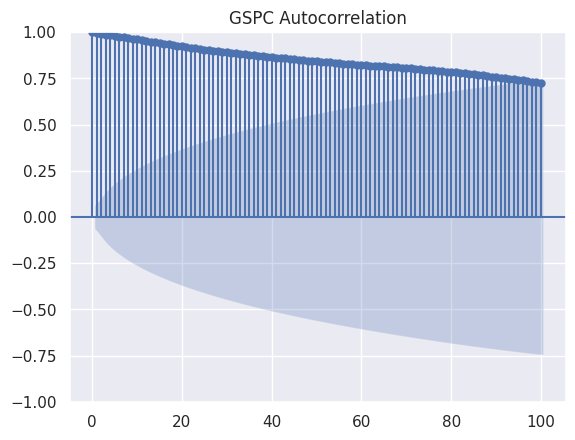

In [162]:
import statsmodels.api as sm
for i in pf.columns:
  sm.graphics.tsa.plot_acf(pf[i], lags = 100, title=i+" Autocorrelation");

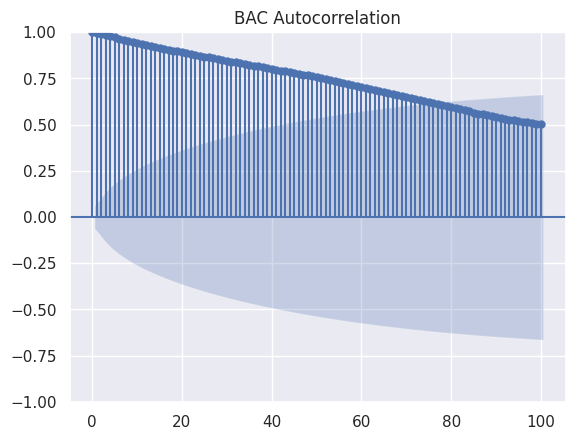

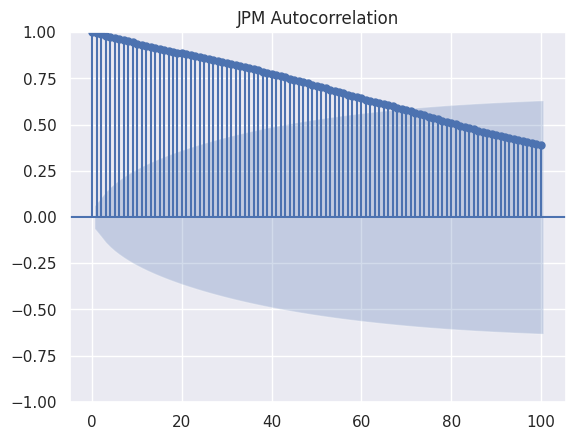

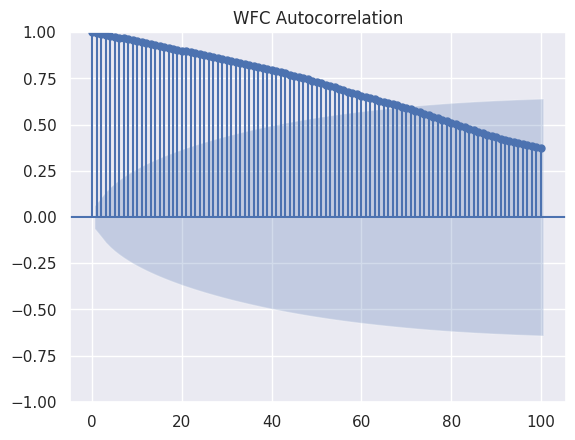

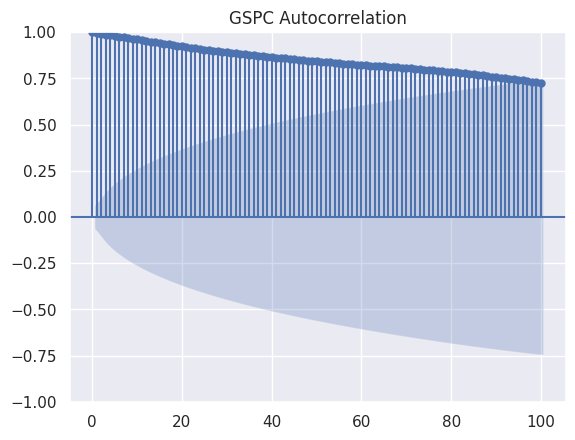

In [163]:
import statsmodels.api as sm
for i in pf.columns:
  sm.graphics.tsa.plot_acf(pf[i], lags = 100, title=i+" Autocorrelation");

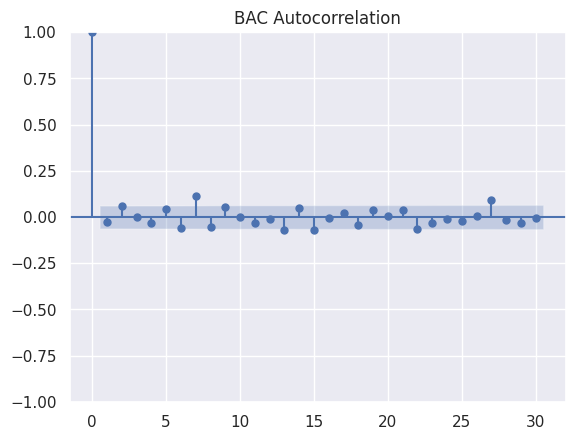

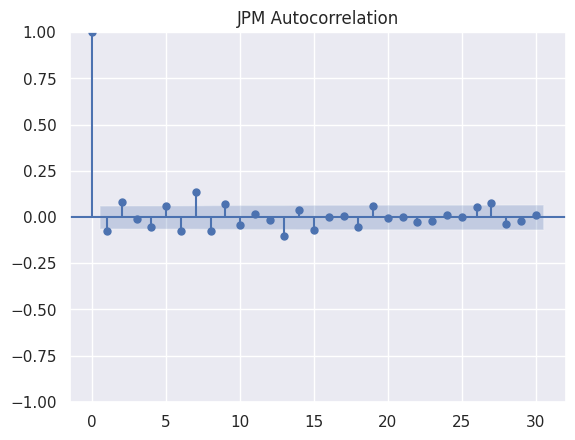

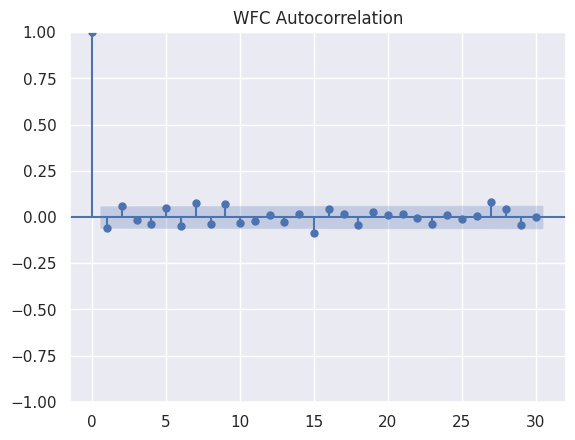

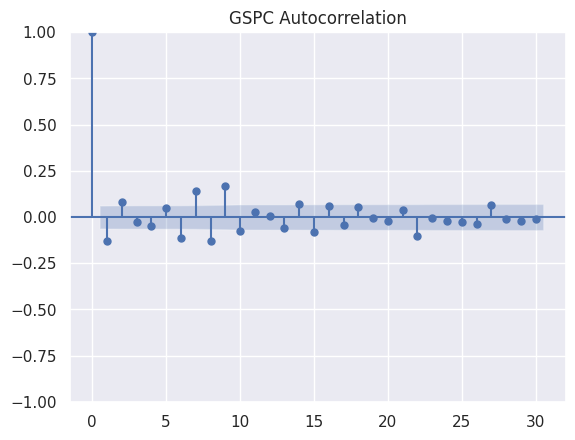

In [164]:
sm.graphics.tsa.plot_acf(BACDiff, lags = 30, title="BAC Autocorrelation");
sm.graphics.tsa.plot_acf(JPMDiff, lags = 30, title="JPM Autocorrelation");
sm.graphics.tsa.plot_acf(WFCDiff, lags = 30, title="WFC Autocorrelation");
sm.graphics.tsa.plot_acf(GSPCDiff, lags = 30, title="GSPC Autocorrelation");

All four stocks have significant autocorrelation at the lag of 7. This means that the returns of the stocks are correlated with their own returns 7 days ago.


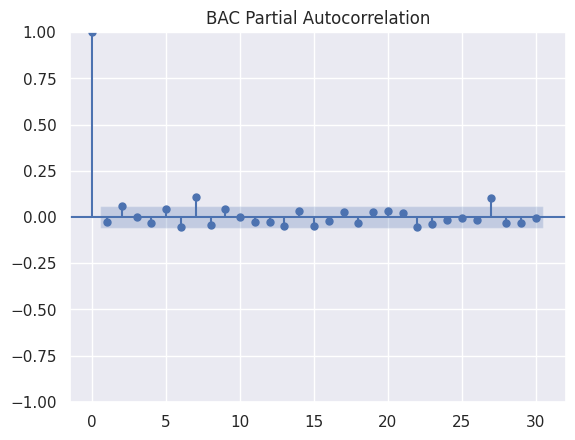

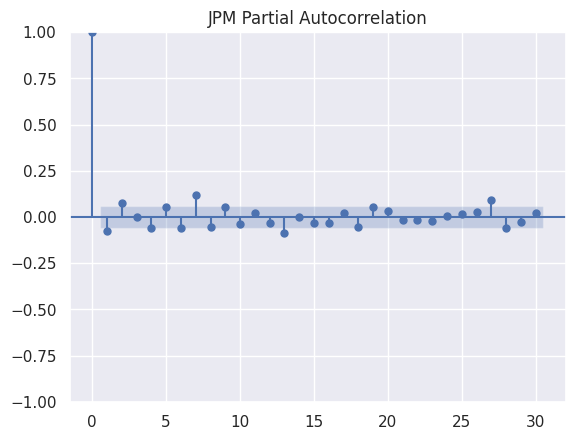

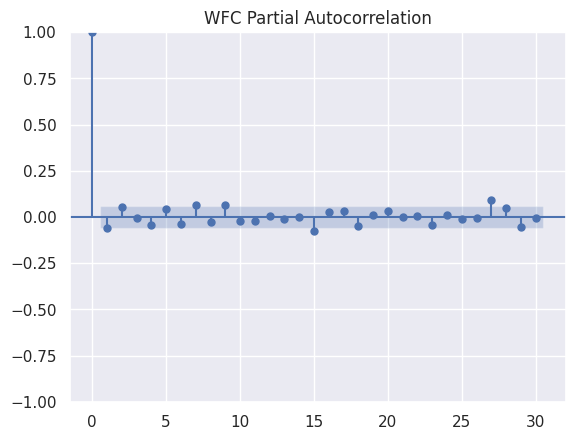

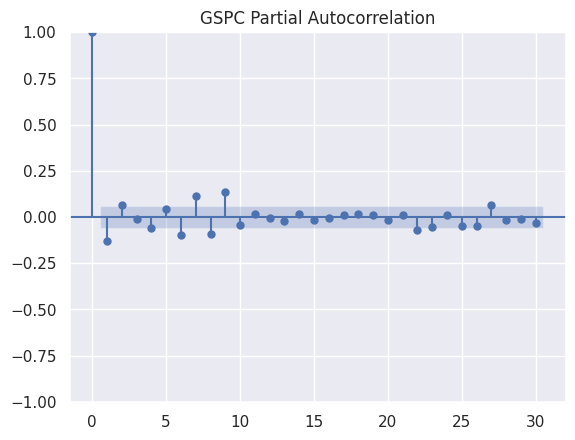

In [165]:
sm.graphics.tsa.plot_pacf(BACDiff, lags = 30, title="BAC Partial Autocorrelation");
sm.graphics.tsa.plot_pacf(JPMDiff, lags = 30, title="JPM Partial Autocorrelation");
sm.graphics.tsa.plot_pacf(WFCDiff, lags = 30, title="WFC Partial Autocorrelation");
sm.graphics.tsa.plot_pacf(GSPCDiff, lags = 30, title="GSPC Partial Autocorrelation");

As we can see from the image, all four stocks have a significant spike at the lag of 7 in the PACF. This indicates that the returns of the stocks are correlated with their own returns 7 days ago, even after controlling for the effects of the previous 6 days.


In [166]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [167]:
l = int(len(pf)*0.8)

In [168]:
trainJPM = pf['JPM'][:l]
testJPM = pf['JPM'][l:]
arimaJPM = ARIMA(pf['JPM'], order=(7, 1, 7))
arimaResJPM  = arimaJPM.fit()

trainBAC = pf['BAC'][:l]
testBAC = pf['BAC'][l:]
arimaBAC= ARIMA(pf['BAC'], order=(7, 1, 7))
arimaResBAC  = arimaBAC.fit()

trainWFC = pf['WFC'][:l]
testWFC = pf['WFC'][l:]
arimaWFC = ARIMA(pf['WFC'], order=(7, 1, 7))
arimaResWFC  = arimaWFC.fit()

trainGSPC = pf['GSPC'][:l]
testGSPC = pf['GSPC'][l:]
arimaGSPC = ARIMA(pf['GSPC'], order=(7, 1, 7))
arimaResGSPC  = arimaGSPC.fit()

In [169]:
start = len(trainJPM)
end = len(trainJPM) + len(testJPM) - 1

In [170]:
arimaPredWFC = arimaResWFC.predict(start, end)
arimaPredWFC.index = testWFC.index

arimaPredBAC = arimaResBAC.predict(start, end)
arimaPredBAC.index = testBAC.index

arimaPredJPM = arimaResJPM.predict(start, end)
arimaPredJPM.index = testJPM.index

arimaPredGSPC = arimaResGSPC.predict(start, end)
arimaPredGSPC.index = testGSPC.index

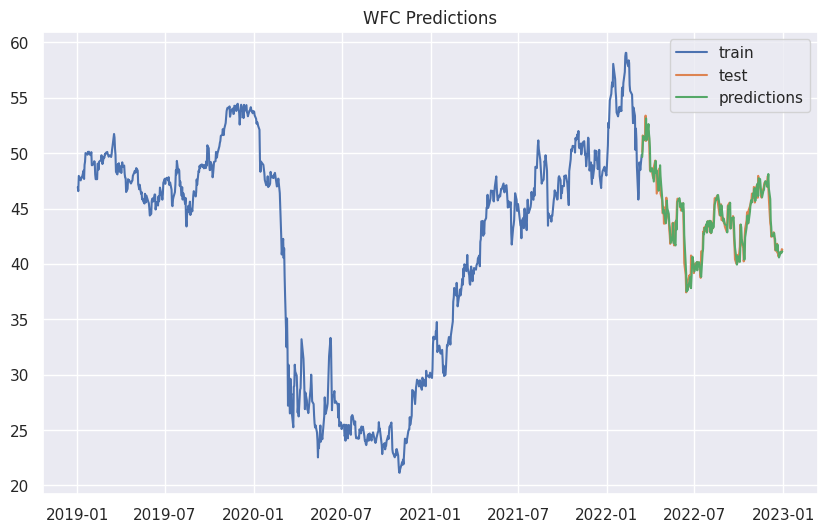

In [171]:
plt.figure(figsize=(10,6))
plt.plot(trainWFC, label='train')
plt.plot(testWFC, label='test')
plt.plot(arimaPredWFC, label='predictions')
plt.title('WFC Predictions')
plt.legend()
plt.show()

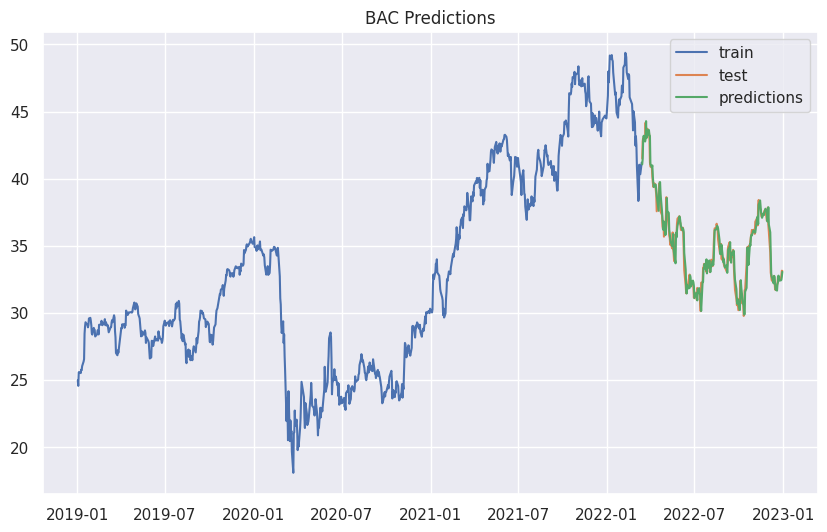

In [172]:
plt.figure(figsize=(10,6))
plt.plot(trainBAC, label='train')
plt.plot(testBAC, label='test')
plt.plot(arimaPredBAC, label='predictions')
plt.title('BAC Predictions')
plt.legend()
plt.show()

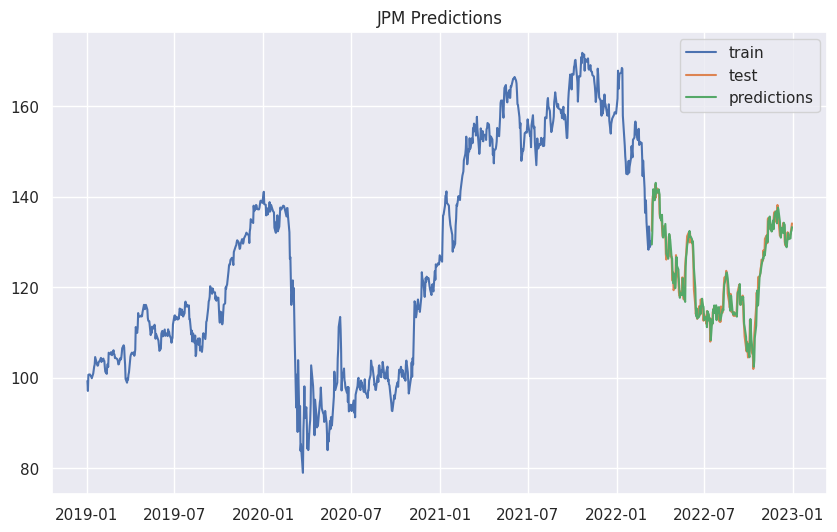

In [173]:
plt.figure(figsize=(10,6))
plt.plot(trainJPM, label='train')
plt.plot(testJPM, label='test')
plt.plot(arimaPredJPM, label='predictions')
plt.title('JPM Predictions')
plt.legend()
plt.show()

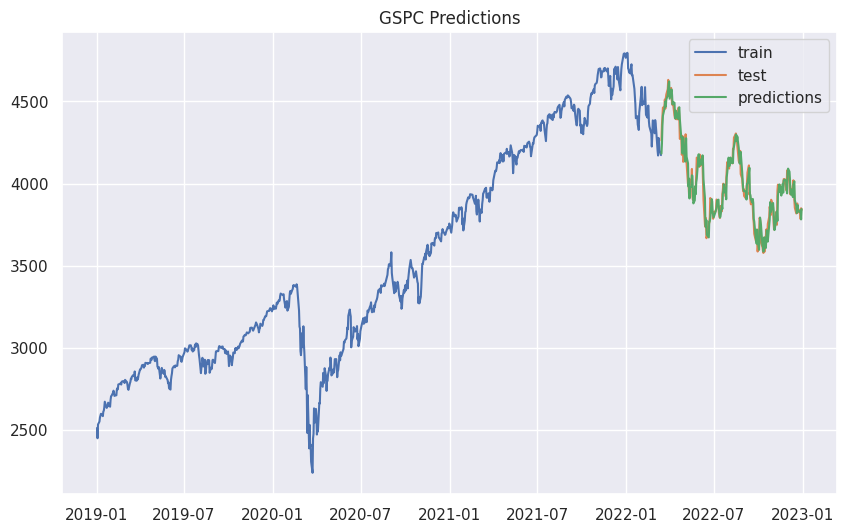

In [174]:
plt.figure(figsize=(10,6))
plt.plot(trainGSPC, label='train')
plt.plot(testGSPC, label='test')
plt.plot(arimaPredGSPC, label='predictions')
plt.title('GSPC Predictions')
plt.legend()
plt.show()

In [175]:
arimaPredDiffWFC = arimaPredWFC.diff().dropna()
arimaPredDiffBAC = arimaPredBAC.diff().dropna()
arimaPredDiffJPM = arimaPredJPM.diff().dropna()
arimaPredDiffGSPC = arimaPredGSPC.diff().dropna()

In [176]:
diffLenWFC = int(len(WFCDiff)*0.8)
diffTrainWFC = WFCDiff[:diffLenWFC]
diffTestWFC = WFCDiff[diffLenWFC:]

diffLenBAC = int(len(BACDiff)*0.8)
diffTrainBAC = BACDiff[:diffLenBAC]
diffTestBAC = BACDiff[diffLenBAC:]

diffLenJPM = int(len(JPMDiff)*0.8)
diffTrainJPM = JPMDiff[:diffLenJPM]
diffTestJPM = JPMDiff[diffLenJPM:]

diffLenGSPC = int(len(GSPCDiff)*0.8)
diffTrainGSPC= GSPCDiff[:diffLenGSPC]
diffTestGSPC = GSPCDiff[diffLenGSPC:]

In [177]:
maeWFC = mean_absolute_error(diffTestWFC.iloc[1:], arimaPredDiffWFC)
mseWFC = mean_squared_error(diffTestWFC.iloc[1:], arimaPredDiffWFC)
rmseWFC = np.sqrt(mean_squared_error(diffTestWFC.iloc[1:], arimaPredDiffWFC))

maeBAC = mean_absolute_error(diffTestBAC.iloc[1:], arimaPredDiffBAC)
mseBAC = mean_squared_error(diffTestBAC.iloc[1:], arimaPredDiffBAC)
rmseBAC = np.sqrt(mean_squared_error(diffTestBAC.iloc[1:], arimaPredDiffBAC))

maeJPM = mean_absolute_error(diffTestJPM.iloc[1:], arimaPredDiffJPM)
mseJPM = mean_squared_error(diffTestJPM.iloc[1:], arimaPredDiffJPM)
rmseJPM = np.sqrt(mean_squared_error(diffTestJPM.iloc[1:], arimaPredDiffJPM))

maeGSPC = mean_absolute_error(diffTestGSPC.iloc[1:], arimaPredDiffGSPC)
mseGSPC = mean_squared_error(diffTestGSPC.iloc[1:], arimaPredDiffGSPC)
rmseGSPC = np.sqrt(mean_squared_error(diffTestGSPC.iloc[1:], arimaPredDiffGSPC))

In [178]:
WFCPerf = {'maeWFC':maeWFC, 'mseWFC':mseWFC, 'rmseWFC':rmseWFC}
WFCPerf = pd.DataFrame([WFCPerf])
print(WFCPerf)

BACPerf = {'maeBAC':maeBAC, 'mseBAC':mseBAC, 'rmseBAC':rmseBAC}
BACPerf = pd.DataFrame([BACPerf])
print(BACPerf)

JPMPerf = {'maeJPM':maeJPM, 'mseJPM':mseJPM, 'rmseJPM':rmseJPM}
JPMPerf = pd.DataFrame([JPMPerf])
print(JPMPerf)

GSPCPerf = {'maeGSPC':maeGSPC, 'mseGSPC':mseGSPC, 'rmseGSPC':rmseGSPC}
GSPCPerf = pd.DataFrame([GSPCPerf])
print(GSPCPerf)

     maeWFC    mseWFC   rmseWFC
0  0.937454  1.476289  1.215026
     maeBAC   mseBAC   rmseBAC
0  0.707607  0.85472  0.924511
     maeJPM    mseJPM   rmseJPM
0  2.319251  8.420775  2.901857
     maeGSPC      mseGSPC   rmseGSPC
0  69.049663  7194.012867  84.817527


##Forecasting

In [179]:
arima_model_WFC = ARIMA(pf['WFC'], order=(7,1,7))
arima_result_WFC = arima_model_WFC.fit()

arima_model_BAC = ARIMA(pf['BAC'], order=(7,1,7))
arima_result_BAC = arima_model_BAC.fit()

arima_model_JPM = ARIMA(pf['JPM'], order=(7,1,7))
arima_result_JPM = arima_model_JPM.fit()

arima_model_GSPC = ARIMA(pf['GSPC'], order=(7,1,7))
arima_result_GSPC = arima_model_GSPC.fit()

In [180]:
forecast_index_WFC = pd.date_range(testWFC.index[-1], periods=10)
forecast_index_BAC = pd.date_range(testBAC.index[-1], periods=10)
forecast_index_JPM = pd.date_range(testJPM.index[-1], periods=10)
forecast_index_GSPC = pd.date_range(testGSPC.index[-1], periods=10)

In [181]:
arima_forecast_WFC = arima_result_WFC.forecast(steps=10)
arima_forecast_WFC.index = forecast_index_WFC

arima_forecast_BAC = arima_result_BAC.forecast(steps=10)
arima_forecast_BAC.index = forecast_index_BAC

arima_forecast_JPM = arima_result_JPM.forecast(steps=10)
arima_forecast_JPM.index = forecast_index_JPM

arima_forecast_GSPC = arima_result_GSPC.forecast(steps=10)
arima_forecast_GSPC.index = forecast_index_GSPC

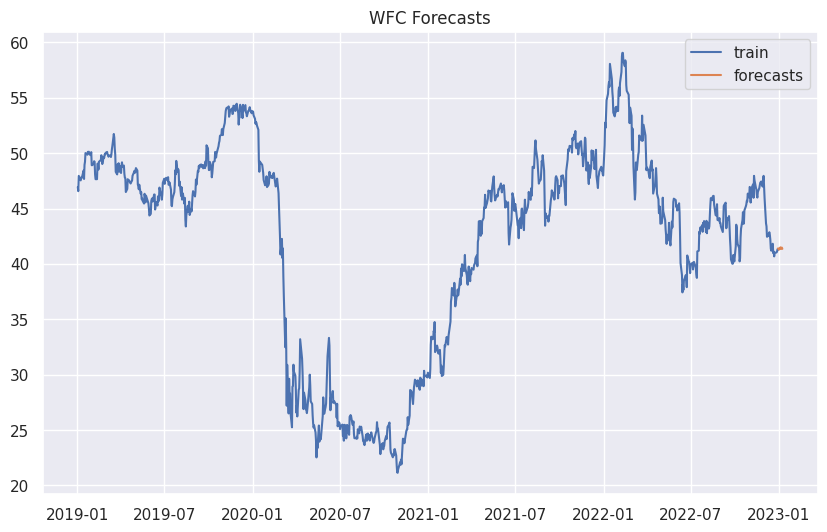

In [182]:
plt.figure(figsize=(10,6))
plt.plot(pf['WFC'], label='train')
plt.plot(arima_forecast_WFC, label='forecasts')
plt.title('WFC Forecasts')
plt.legend()
plt.show()

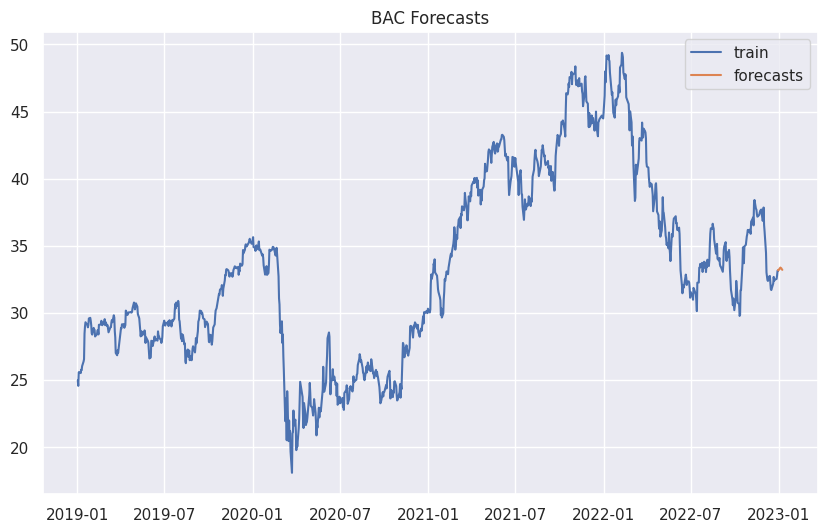

In [183]:
plt.figure(figsize=(10,6))
plt.plot(pf['BAC'], label='train')
plt.plot(arima_forecast_BAC, label='forecasts')
plt.title('BAC Forecasts')
plt.legend()
plt.show()

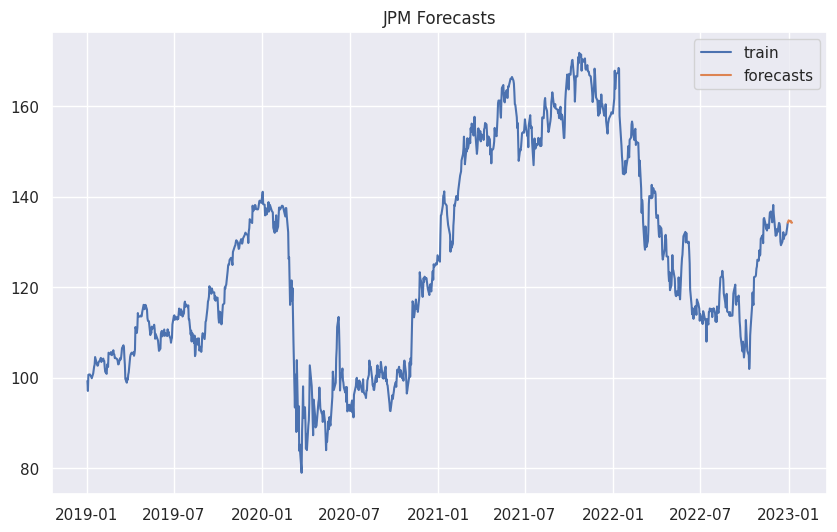

In [184]:
plt.figure(figsize=(10,6))
plt.plot(pf['JPM'], label='train')
plt.plot(arima_forecast_JPM, label='forecasts')
plt.title('JPM Forecasts')
plt.legend()
plt.show()

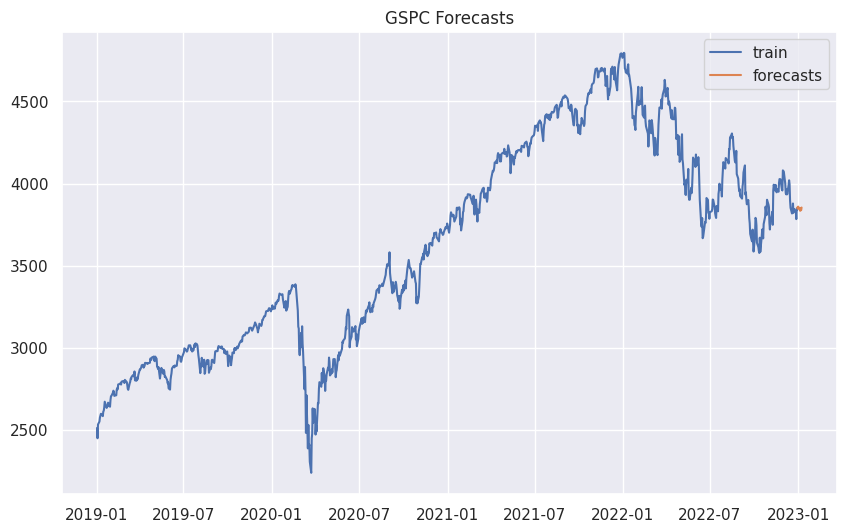

In [185]:
plt.figure(figsize=(10,6))
plt.plot(pf['GSPC'], label='train')
plt.plot(arima_forecast_GSPC, label='forecasts')
plt.title('GSPC Forecasts')
plt.legend()
plt.show()

In [186]:
pip install arch

In [187]:
from arch import arch_model
stock_data = port

# GARCH Modeling with Rescaled Data
volatility_data = pd.DataFrame(index=stock_data.index)

for stock in stocks:
    # Convert returns to percentage
    returns = 100 * stock_data[stock].pct_change().dropna()
    model = arch_model(returns, vol='Garch', p=1, q=1, rescale=False)
    res = model.fit(disp='off')
    forecast = res.forecast(start=0)
    volatility_data[stock] = forecast.variance





# "Daily Conditional Volatility (2019-2022)" - Represents the time-varying volatility in the daily returns of the selected stocks and index.

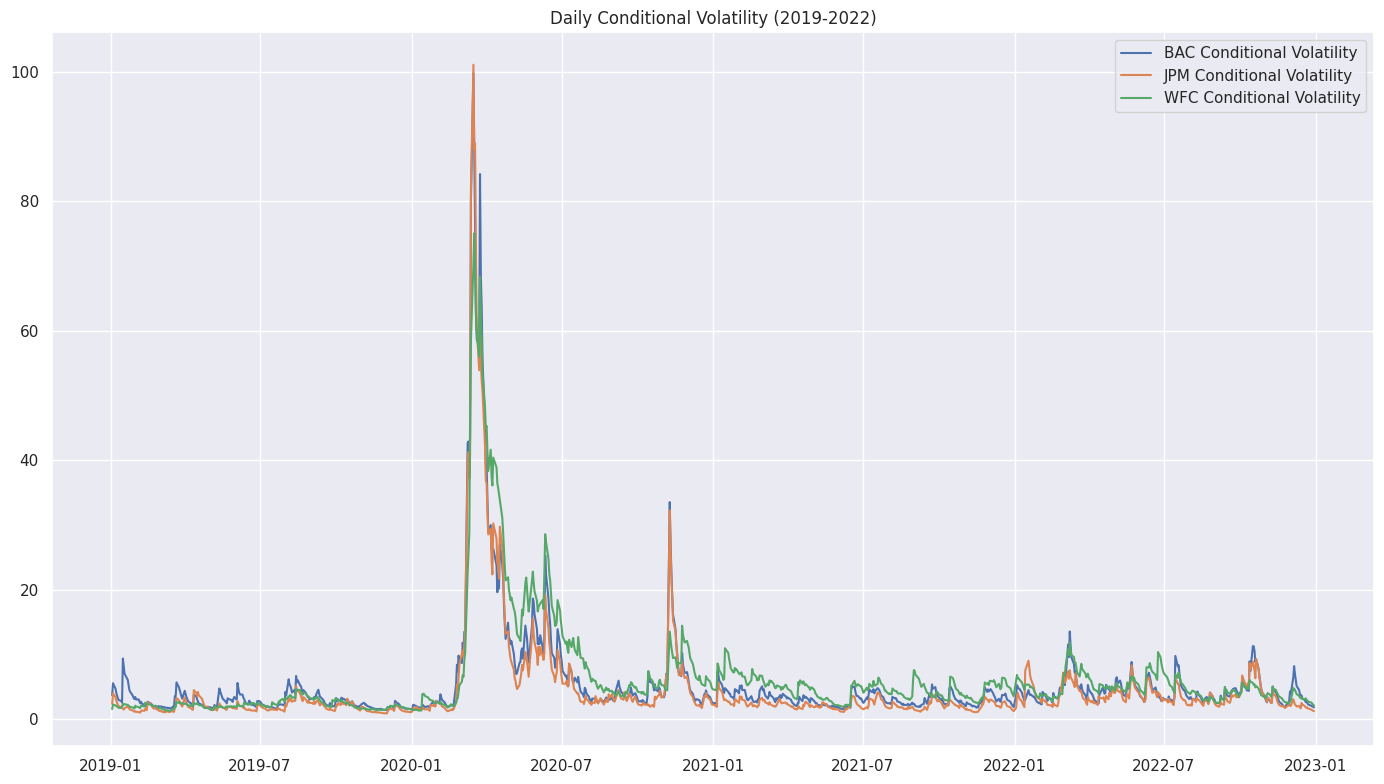

In [189]:

# Visualization: Daily Conditional Volatility
plt.figure(figsize=(14, 8))
for stock in stocks:
    plt.plot(volatility_data.index, volatility_data[stock], label=f'{stock} Conditional Volatility')
plt.title('Daily Conditional Volatility (2019-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A significant spike in volatility across all entities at the start of 2020, likely attributed to market uncertainties due to the COVID-19 pandemic.
Subsequent periods show a decline in volatility with occasional spikes, possibly due to various market-influencing events.
The conditional volatilities of JPM, BAC, and WFC are closely aligned with the broader market trend represented by the S&P 500 (^GSPC).

# "Yearly Aggregated Volatility (2019-2022)" - Indicates that the volatilities displayed are aggregated on a yearly basis.

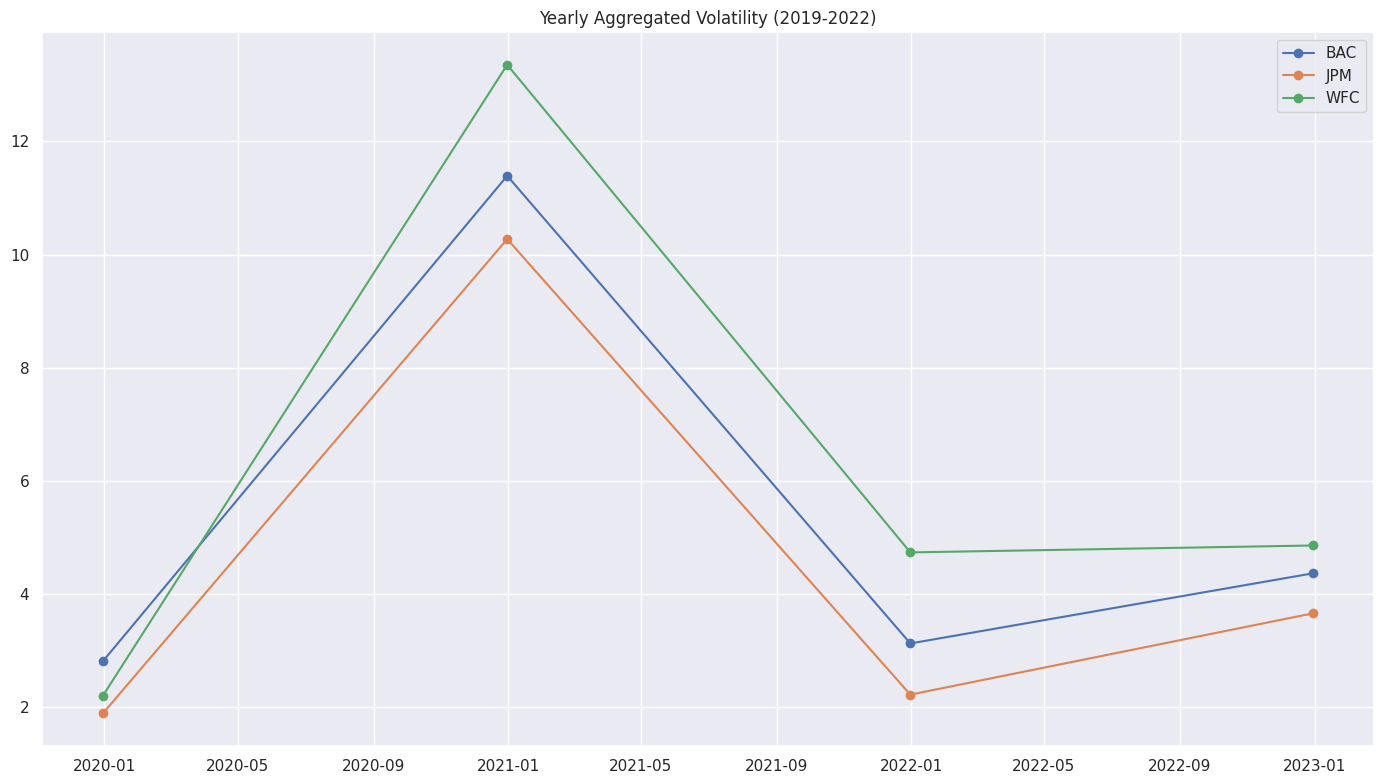

In [190]:
# Visualization: Yearly Aggregated Volatility
yearly_volatility = volatility_data.resample('Y').mean()
plt.figure(figsize=(14, 8))
for stock in stocks:
    plt.plot(yearly_volatility.index, yearly_volatility[stock], label=stock, marker='o')
plt.title('Yearly Aggregated Volatility (2019-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A sharp increase in volatility is seen for all entities in the early part of the period, peaking around mid-2020.
Post peak, there's a noticeable decline across all entities, indicating a stabilization in the markets or the entities' specific financials.The volatilities seem to level off towards the end of the period, suggesting a reduction in uncertainty or risk as perceived by the market.

# heatmaps visualizes the monthly volatility from 2019 to 2022

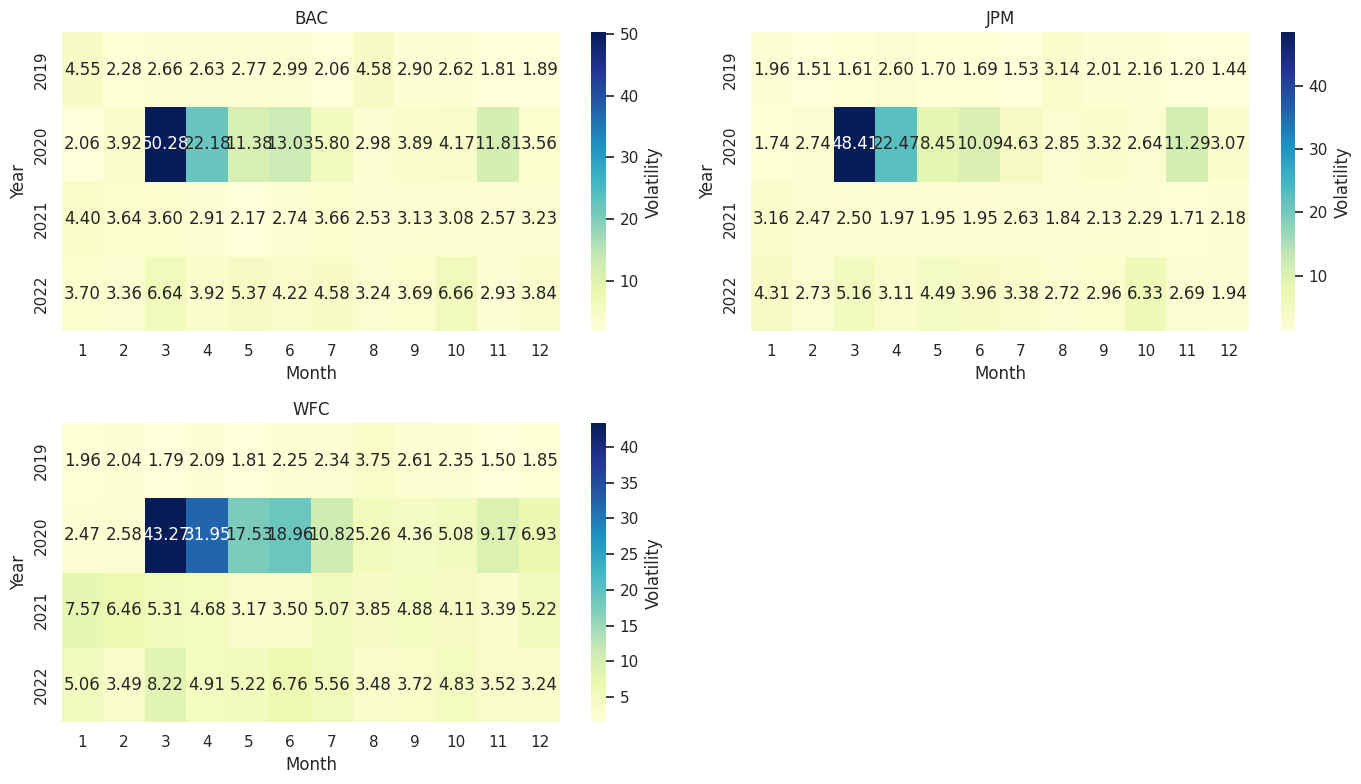

In [191]:
import seaborn as sns

# 1. Monthly Volatility Heatmap
monthly_volatility = volatility_data.resample('M').mean()

plt.figure(figsize=(14, 8))
for idx, stock in enumerate(stocks, 1):
    plt.subplot(2, 2, idx)
    monthly_avg_volatility = monthly_volatility[stock].groupby([monthly_volatility.index.year, monthly_volatility.index.month]).mean().unstack()
    sns.heatmap(monthly_avg_volatility, cmap='YlGnBu', cbar_kws={'label': 'Volatility'}, annot=True, fmt=".2f")
    plt.title(stock)
    plt.xlabel('Month')
    plt.ylabel('Year')
plt.tight_layout()
plt.show()




2020 Volatility Surge: All entities exhibit a significant increase in volatility in early 2020, with darker shades indicating higher volatility levels.

Consistent Decline Post-2020: After the 2020 surge, a consistent decline in volatility is observed across all entities, symbolized by the transition to lighter shades in the heatmaps. This indicates a trend of market stabilization and reduced uncertainty in subsequent periods.

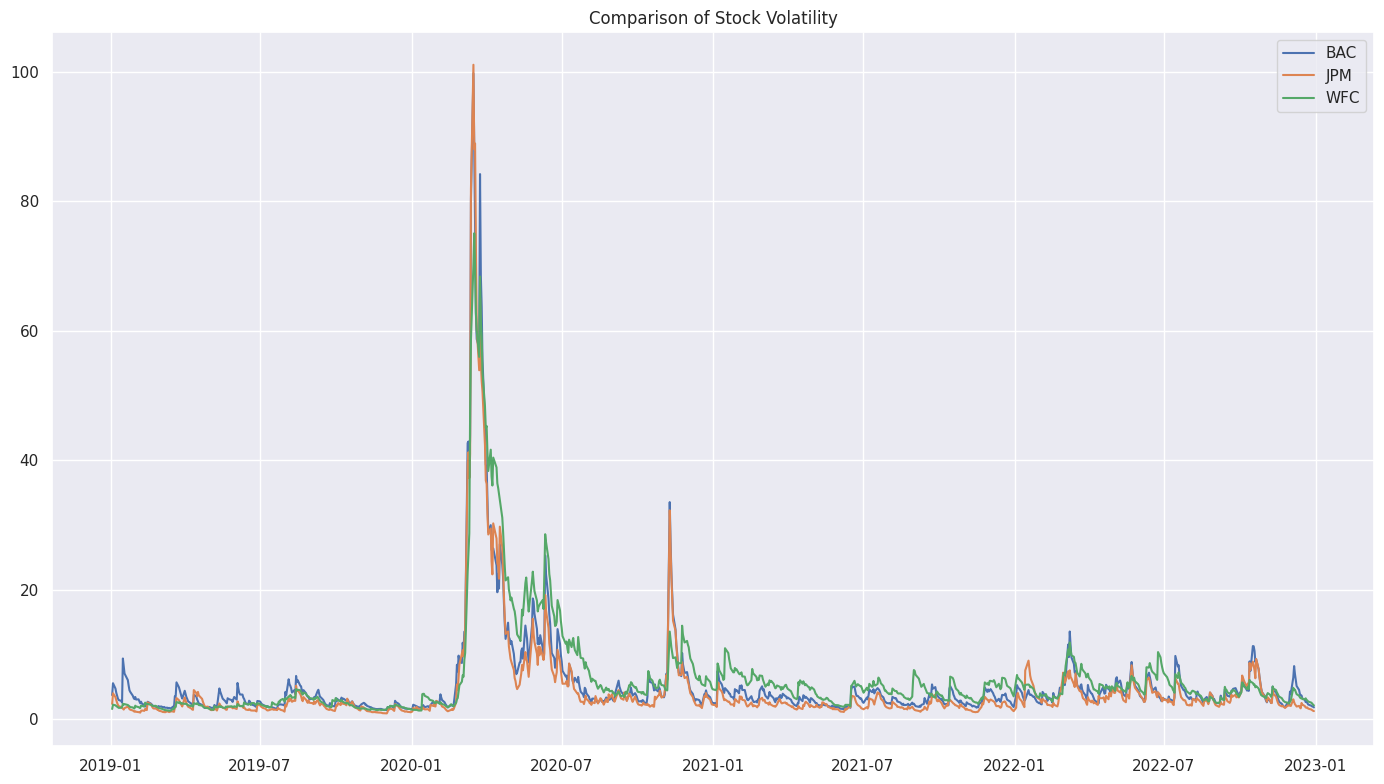

In [192]:
# 2. Comparison with S&P 500
plt.figure(figsize=(14, 8))
for stock in stocks[:]:  # Exclude S&P 500 for this plot
    plt.plot(volatility_data.index, volatility_data[stock], label=stock)

plt.title('Comparison of Stock Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



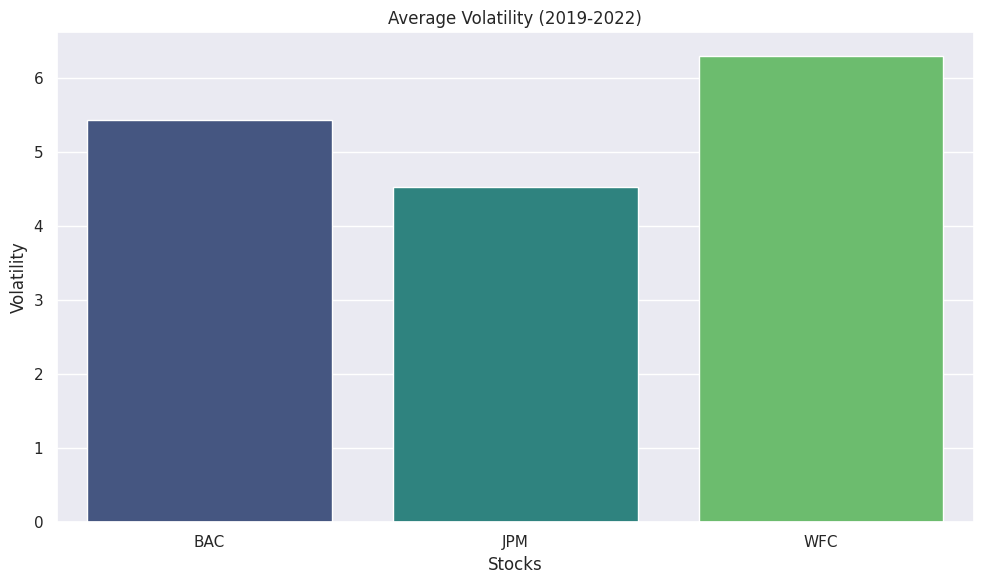

In [193]:
# 3. Bar Plot of Average Volatility
avg_volatility = volatility_data.mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_volatility.index, y=avg_volatility.values, palette="viridis")
plt.title('Average Volatility (2019-2022)')
plt.ylabel('Volatility')
plt.xlabel('Stocks')
plt.tight_layout()
plt.show()

Comparison Among Entities: BAC (Bank of America) and WFC (Wells Fargo) exhibit higher average volatility compared to JPM (JPMorgan Chase & Co.) and ^GSPC (S&P 500 Index). This indicates that BAC and WFC stocks, on average, experienced more fluctuation over the period from 2019 to 2022.
S&P 500 as a Benchmark: The ^GSPC (S&P 500 Index) has the lowest average volatility, reflecting its nature as a diversified index and a benchmark representing the broader market, which is generally less volatile compared to individual stocks.